## Importing necessary libraries

In [11]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Import Data

## Taking Musical_Instruments 

In [2]:
Musical_Review = pd.read_json('Musical_Instruments_5.json',lines=True)
Musical_Review

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


## Data Understanding

In [3]:
Musical_Review.shape

(10261, 9)

In [4]:
Musical_Review.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [5]:
Musical_Review.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
Musical_Review.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


## Data Preparation

## 27 Null Values are in reviewerName column , so going to drop that column

In [3]:
Musical_Review.drop(['reviewerName'],axis=1,inplace=True)
Musical_Review

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


In [8]:
Musical_Review.shape

(10261, 8)

In [9]:
Musical_Review.isnull().sum()

reviewerID        0
asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

## Generating Subjectivity and Polarity based on review summary

In [4]:
def calc_sub(summ):
    return TextBlob(summ).sentiment.subjectivity

# Polarity
def calc_pola(summ):
    return TextBlob(summ).sentiment.polarity

Musical_Review['subjectivity_summary'] = Musical_Review.summary.apply(calc_sub)
Musical_Review['polarity_summary']     = Musical_Review.summary.apply(calc_pola)

In [9]:
Musical_Review

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity_summary,polarity_summary,Sentiment_Summary
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,Netural
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,Netural
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,Negative
...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,Netural
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,Netural


## Classifying the sentiments based on Summary

In [7]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
Musical_Review['Sentiment_Summary'] = Musical_Review.polarity_summary.apply(sentiment)

## Visualizing the counts of different sentiments

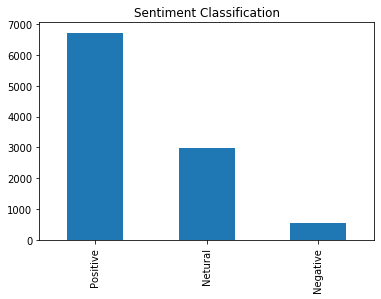

In [8]:
Musical_Review.Sentiment_Summary.value_counts().plot(kind='bar')
plt.title('Sentiment Classification')
plt.show()

In [10]:
# Let's see the percentage of different sentiment's class

# creat
Df_Sentiment_Summary = pd.DataFrame(Musical_Review.Sentiment_Summary.value_counts(normalize=True)*100)

# Calculating percentage
Df_Sentiment_Summary['Total'] = Musical_Review.Sentiment_Summary.value_counts()

Df_Sentiment_Summary

,Sentiment_Summary,Total
Positive,65.500439,6721
Netural,29.061495,2982
Negative,5.438066,558


## Plotting Wordcloud

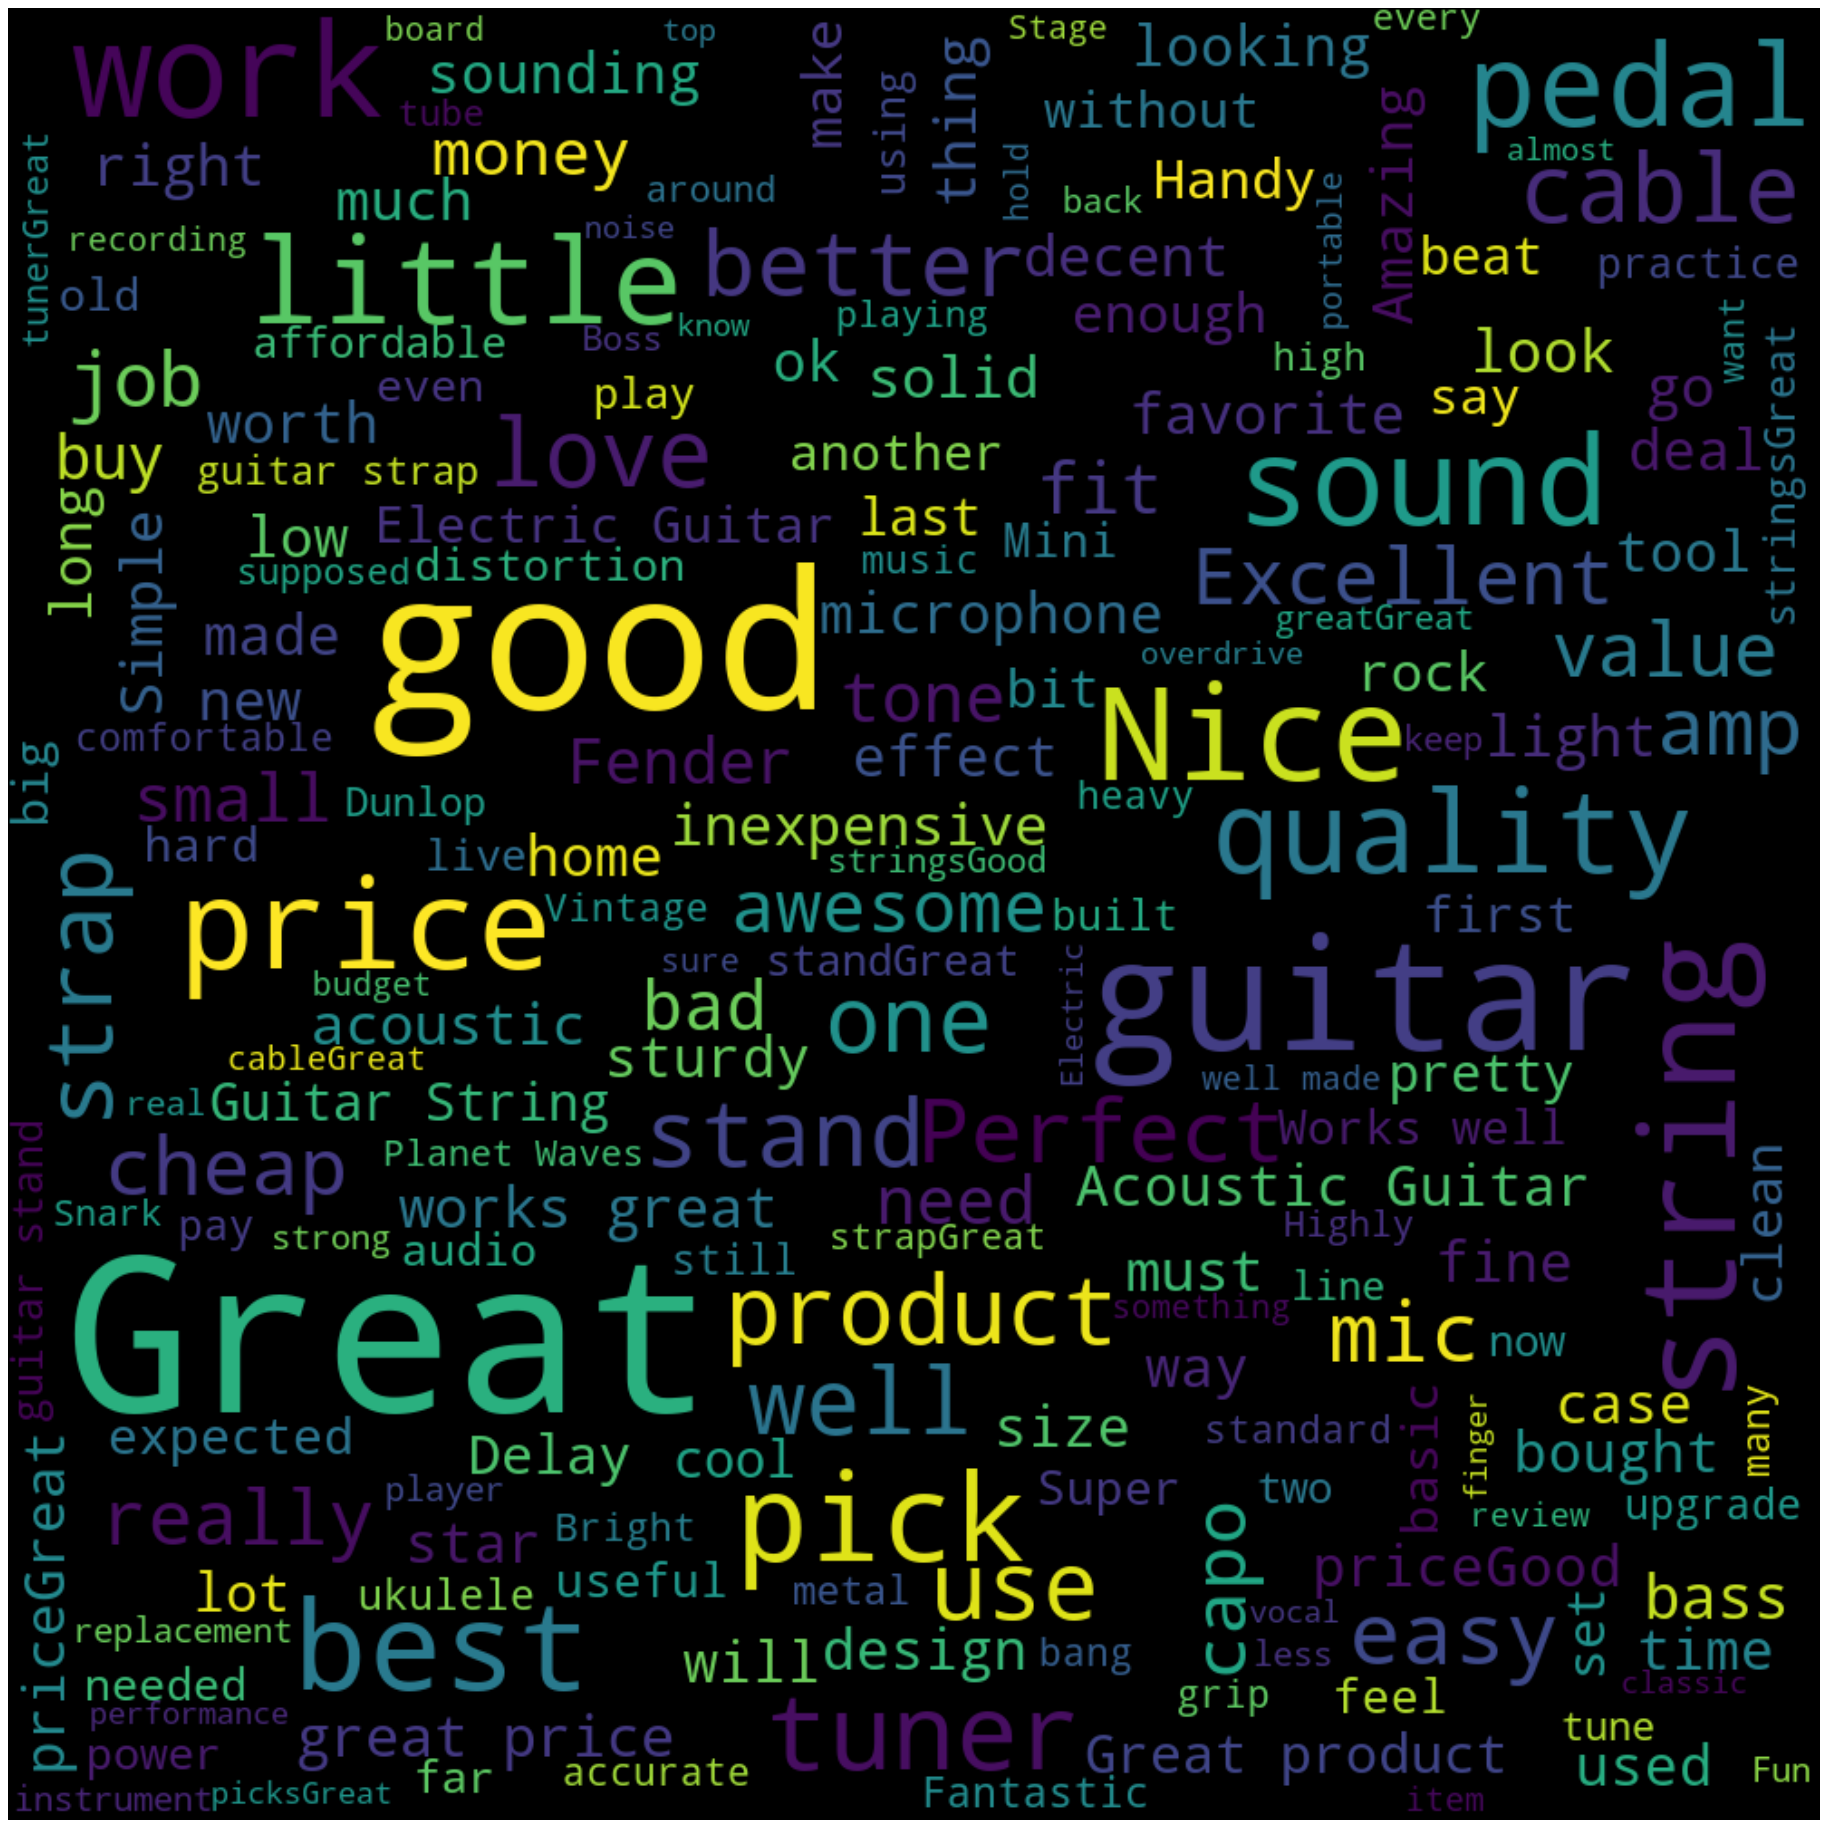

In [12]:
allwords = ''.join([twts for twts in Musical_Review['summary']])
wordcloud = WordCloud(width=1000,height=1000,random_state=21,max_font_size=120).generate(allwords)
plt.figure(figsize=(40,30),dpi=80)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Generating Subjectivity and Polarity based on review

In [13]:
def calc_sub1(review):
    return TextBlob(review).sentiment.subjectivity

# Polarity
def calc_pola1(review):
    return TextBlob(review).sentiment.polarity

Musical_Review['subjectivity_review'] = Musical_Review.reviewText.apply(calc_sub1)
Musical_Review['polarity_review']     = Musical_Review.reviewText.apply(calc_pola1)

In [14]:
Musical_Review

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity_summary,polarity_summary,Sentiment_Summary,subjectivity_review,polarity_review
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,Positive,0.398611,0.250000
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,Netural,0.394444,0.052778
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,Netural,0.434286,0.167500
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,Positive,0.925000,0.200000
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,Negative,0.750000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,Netural,0.575000,0.350000
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,Positive,0.464348,0.188033
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,Positive,0.401459,0.197768
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,Netural,0.535669,0.153843


## Classifying the sentiments based on review

In [15]:
def sentiment1(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
Musical_Review['Sentiment_Review'] = Musical_Review.polarity_review.apply(sentiment1)

In [16]:
Musical_Review

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,subjectivity_summary,polarity_summary,Sentiment_Summary,subjectivity_review,polarity_review,Sentiment_Review
0,A2IBPI20UZIR0U,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",0.6,0.700000,Positive,0.398611,0.250000,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",0.0,0.000000,Netural,0.394444,0.052778,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",0.0,0.000000,Netural,0.434286,0.167500,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",0.6,0.700000,Positive,0.925000,0.200000,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.5,-0.250000,Negative,0.750000,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014",0.0,0.000000,Netural,0.575000,0.350000,Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",0.4,0.283333,Positive,0.464348,0.188033,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014",0.6,0.700000,Positive,0.401459,0.197768,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014",0.0,0.000000,Netural,0.535669,0.153843,Positive


## Visualizing the counts of different sentiments

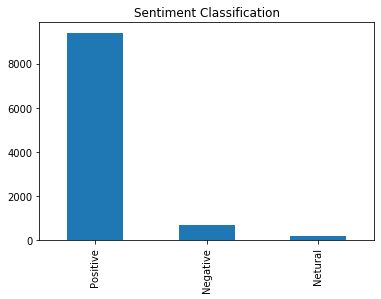

In [17]:
Musical_Review.Sentiment_Review.value_counts().plot(kind='bar')
plt.title('Sentiment Classification')
plt.show()

In [18]:
# Let's see the percentage of different sentiment's class

# creat
Df_Sentiment_Review = pd.DataFrame(Musical_Review.Sentiment_Review.value_counts(normalize=True)*100)

# Calculating percentage
Df_Sentiment_Review['Total'] = Musical_Review.Sentiment_Review.value_counts()

Df_Sentiment_Review

,Sentiment_Review,Total
Positive,91.647988,9404
Negative,6.558815,673
Netural,1.793198,184


## Plotting Wordcloud

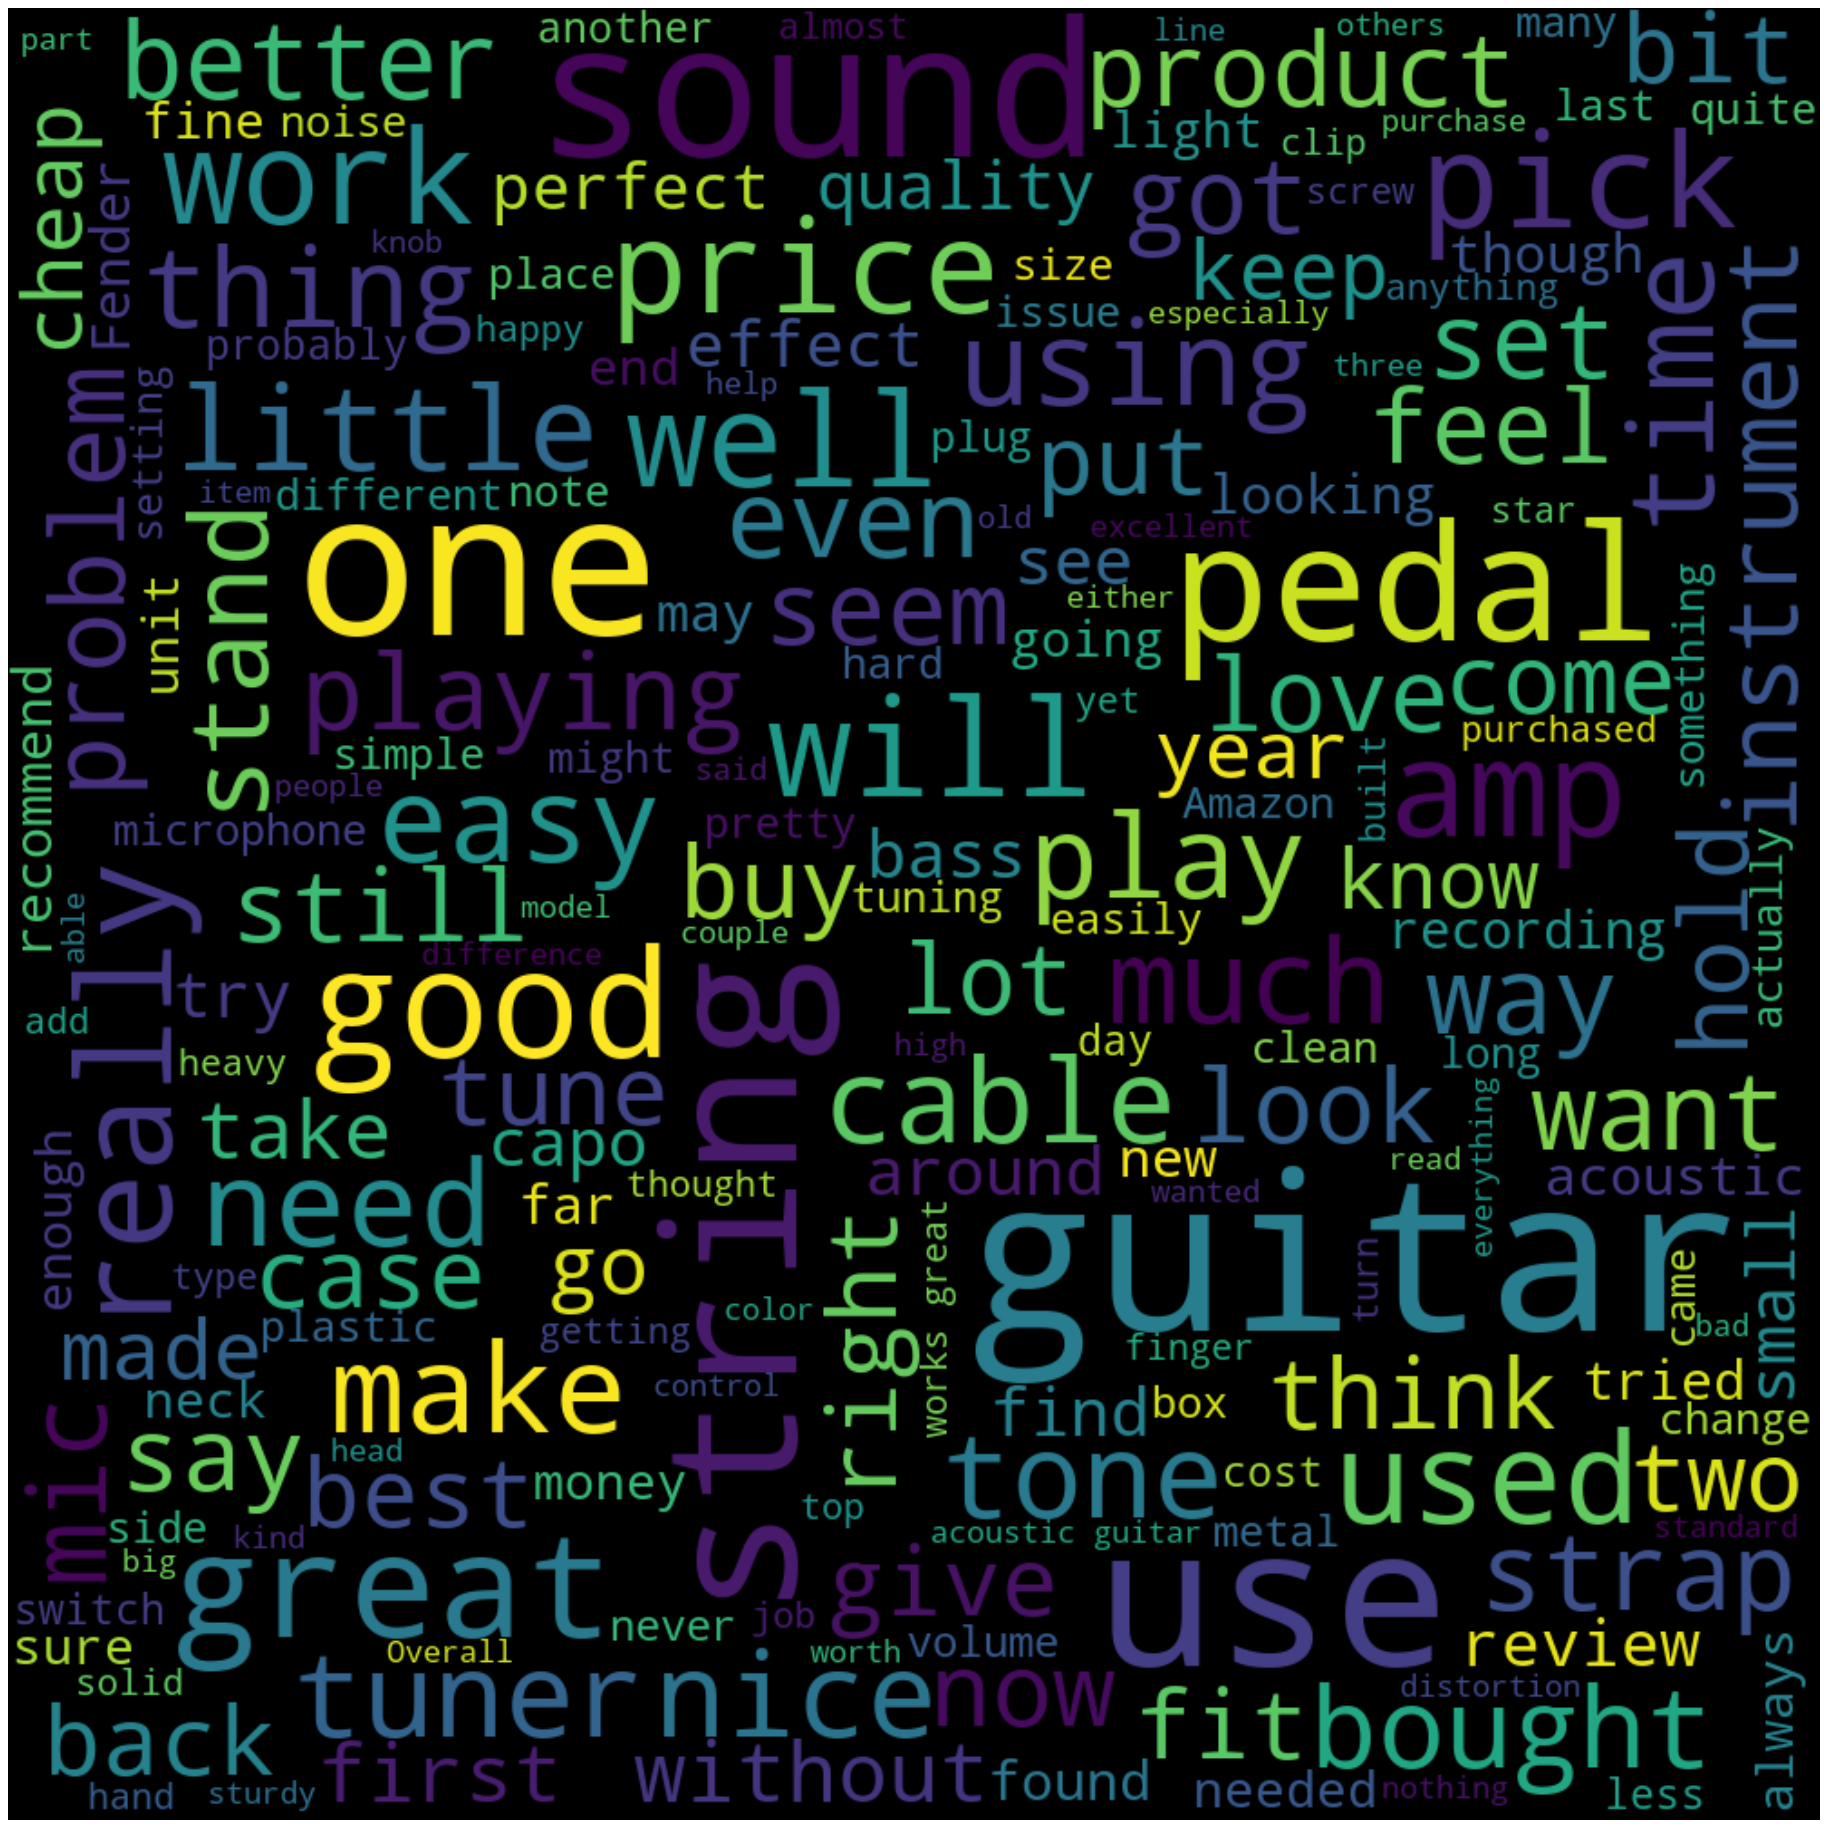

In [19]:
allwords = ''.join([twts for twts in Musical_Review['reviewText']])
wordcloud = WordCloud(width=1000,height=1000,random_state=21,max_font_size=120).generate(allwords)
plt.figure(figsize=(40,30),dpi=80)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()